In [11]:
"""
Exp06A: execution delay sweep

Goal:
- Test how strategy performance changes under execution delay.


Fixed:
- Asset: SPY
- Signal: fixed (MA_WINDOW = 80)
- Risk strategy (Vol_targeting, Risk-off gate): Off
- Regime / sample


Sweep: 
EXEC_DELAY ∈ {0, 1, 2, 3, 5}


"""

'\nExp06A: execution delay sweep\n\nGoal:\n- Test if strategy performance reduces under execution delay.\n\n\nFixed:\n- Asset: SPY\n- Signal: fixed (MA_WINDOW = 80)\n- Risk strategy (Vol_targeting, Risk-off gate): Off\n- Regime / sample: same as Exp05A\n\n\nSweep: \nEXEC_DELAY ∈ {0, 1, 2, 3, 5}\n\n\n'

In [12]:
import os
os.chdir("/Users/kim/Desktop/Quant-Research")
print(os.getcwd())

# os.chdir("..")
# print(os.getcwd())

/Users/kim/Desktop/Quant-Research


In [13]:
import pandas as pd
from runner import run

In [14]:
# Sweep: execution delay 

from copy import deepcopy
from config import Config
from dataclasses import replace


cfg_base = replace(Config(), 
                   MA_WINDOW=80,   # 和Exp02同
                   RISK_MODE="none", # 
                   USE_RISK_OFF_GATE = False
                  )  

delays = [0, 1, 2, 3, 5]

rows = []


for d in delays:
    cfg_d = replace(cfg_base, EXEC_DELAY=d)
    
    _, summary = run(cfg_d)
    summary["EXEC_DELAY"] = d # dict
    rows.append(summary)

exp06 = pd.DataFrame(rows).sort_values(["EXEC_DELAY"]) # 汇总成一个 实验结果表（experiment table）

exp06


/Users/kim/Desktop/Quant-Research/data/loaders.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/Users/kim/Desktop/Quant-Research/data/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  idx = pd.to_datetime(df.index, errors="coerce")
/Users/kim/Desktop/Quant-Research/data/loaders.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/Users/kim/Desktop/Quant-Research/data/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed in

,Annual Return,Max Drawdown,Sharpe,Total Turnover,N_obs,EXEC_DELAY
0,0.249297,-0.082251,2.168994,108.0,2437,0
1,0.069690,-0.192385,0.663331,108.0,2436,1
2,0.063827,-0.193116,0.611141,108.0,2435,2
3,0.070485,-0.209420,0.662678,108.0,2434,3
4,0.078041,-0.217929,0.709543,108.0,2432,5


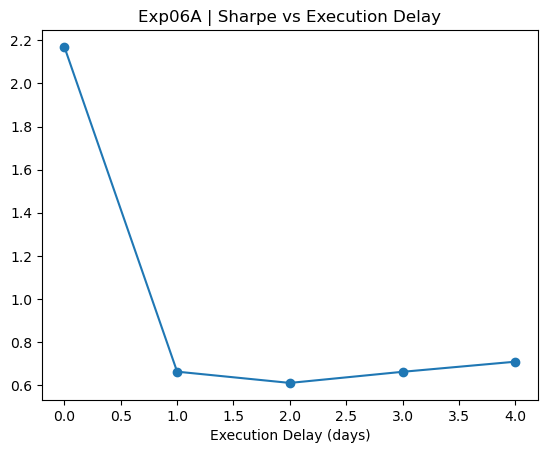

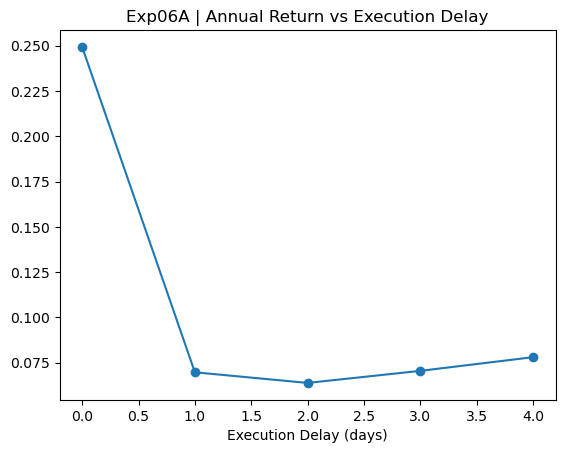

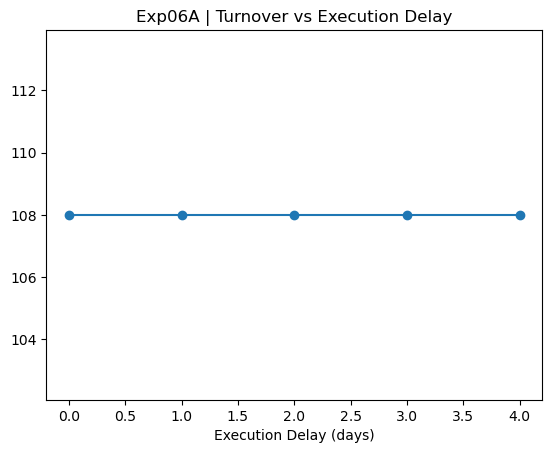

In [15]:
# ---- plots ----

import matplotlib.pyplot as plt

exp06["Sharpe"].plot(marker="o", title="Exp06A | Sharpe vs Execution Delay")
plt.xlabel("Execution Delay (days)")
plt.show()

exp06["Annual Return"].plot(marker="o", title="Exp06A | Annual Return vs Execution Delay")
plt.xlabel("Execution Delay (days)")
plt.show()

exp06["Total Turnover"].plot(marker="o", title="Exp06A | Turnover vs Execution Delay")
plt.xlabel("Execution Delay (days)")
plt.show()